In [1]:
!pip install -r requirements.txt

  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ----- ---------------------------------- 18.1/124.9 MB 81.4 MB/s eta 0:00:02
   ------------ --------------------------- 38.0/124.9 MB 93.0 MB/s eta 0:00:01
   ------------------ --------------------- 57.1/124.9 MB 93.4 MB/s eta 0:00:01
   -------------------------- ------------- 81.5/124.9 MB 98.1 MB/s eta 0:00:01
   -------------------------------- ----- 106.2/124.9 MB 101.2 MB/s eta 0:00:01
   -------------------------------------  124.8/124.9 MB 102.1 MB/s eta 0:00:01
   --------------------------------------- 124.9/124.9 MB 85.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Load the data
df = pd.read_csv('UCI_Credit_Card.csv')

### Dataset Information

In [4]:
df.shape

(30000, 25)

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Exploratory Data Analysis and Data Visualization

- Categorical Variables:
    - SEX: Gender (1=male, 2=female)
    - EDUCATION: Education level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    - MARRIAGE: Marital status (1=married, 2=single, 3=others)
    - PAY_0 to PAY_6: Repayment status for six months (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
    - default.payment.next.month (target variable): Default payment status (1=yes, 0=no)

- Numerical Variables:
    - LIMIT_BAL: Credit limit (NT dollars)
    - AGE: Age in years
    - BILL_AMT1 to BILL_AMT6: Bill statement amounts for six months
    - PAY_AMT1 to PAY_AMT6: Payment amounts for six months

In [8]:
# Renaming columns with more suitable labels
df = df.rename(columns={'default.payment.next.month': 'default', 'PAY_0': 'PAY_1'})

In [9]:
df.drop('ID', axis = 1, inplace =True)

In [10]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


#### Exploring the Categorical variables

In [11]:
# df['SEX'].value_counts()

In [12]:
# Count of the occurrences of each category in the SEX variable
sex_counts = df['SEX'].value_counts()
print("\nGender Distribution:")
print("-------------------")
print(f"Male:   {sex_counts[1]:,}")
print(f"Female: {sex_counts[2]:,}")
print("-------------------")


Gender Distribution:
-------------------
Male:   11,888
Female: 18,112
-------------------


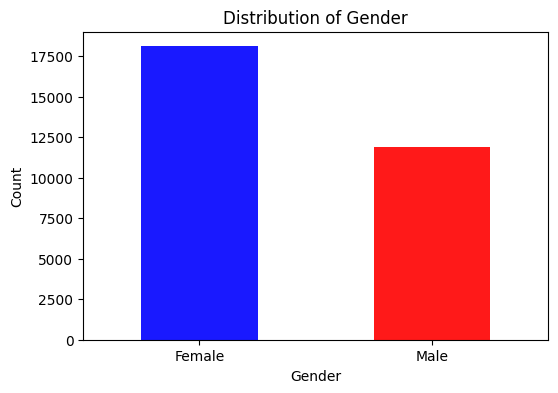

In [13]:
# Plotting the distribution of SEX
plt.figure(figsize=(6, 4))
sex_counts.index = ['Female', 'Male']
sex_counts.plot(kind='bar', color=['blue', 'red'], alpha=0.9)
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

Interpretation of Gender Distribution:
1. Males represent a smaller portion of the dataset with 11,888 individuals
2. Females make up the majority with 18,112 individuals

In [14]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [15]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [16]:
education_counts = df['EDUCATION'].value_counts()
education_counts = education_counts.loc[[1, 2, 3, 4]]
education_counts.index = ['Graduate School', 'University', 'High School', 'Others']
print("\nEducation Level Distribution:")
print("--------------------------")
print(education_counts)
print("--------------------------")


Education Level Distribution:
--------------------------
Graduate School    10585
University         14030
High School         4917
Others               468
Name: count, dtype: int64
--------------------------


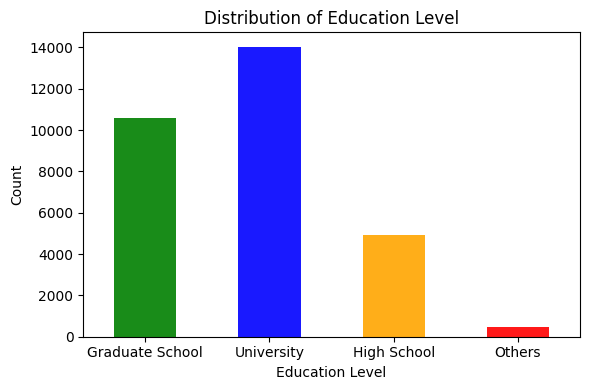

In [17]:
# Plotting the distribution of EDUCATION
plt.figure(figsize=(6, 4))
education_counts.plot(kind='bar', color=['green', 'blue', 'orange', 'red'], alpha=0.9)
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Interpretation of Education Level Distribution:
1. University graduates form the largest group with about 14,030 individuals
2. Graduate School is the second largest with approximately 10,585 individuals
3. High School graduates number around 4,917
4. A small number (123) fall into the Others category

In [18]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [19]:
fil = (df.MARRIAGE == 0)
df.loc[fil, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [20]:
# Count of the occurrences of each category in the MARRIAGE variable
marriage_counts = df['MARRIAGE'].value_counts()
marriage_counts = marriage_counts.loc[[1, 2, 3]]  # Assuming 1, 2, 3 correspond to the categories as labeled
marriage_counts.index = ['Married', 'Single', 'Others']
print("\nMarital Status Distribution:")
print("-------------------------")
print(marriage_counts)
print("-------------------------")


Marital Status Distribution:
-------------------------
Married    13659
Single     15964
Others       377
Name: count, dtype: int64
-------------------------


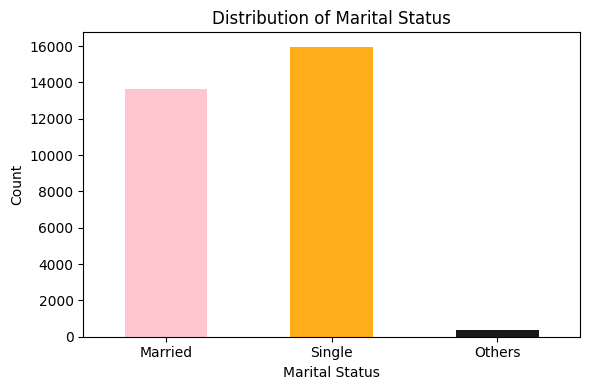

In [21]:
# Plotting the distribution of MARRIAGE
plt.figure(figsize=(6, 4))
marriage_counts.plot(kind='bar', color=['pink', 'orange', 'black'], alpha=0.9)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Interpretation of Marital Status Distribution:
1. Single individuals form the largest group with 15,964 people
2. Married individuals are the second largest with about 13,659 people
3. A small number (323) fall into the Others category

In [22]:
# Count of default payment status
target_counts = df['default'].value_counts()
target_counts = target_counts.loc[[0, 1]]
target_counts.index = ['No Default', 'Default']
print("\nDefault Payment Distribution:")
print("--------------------------")
print(f"No Default:  {target_counts['No Default']:,}")
print(f"Default:     {target_counts['Default']:,}")
print("--------------------------")


Default Payment Distribution:
--------------------------
No Default:  23,364
Default:     6,636
--------------------------


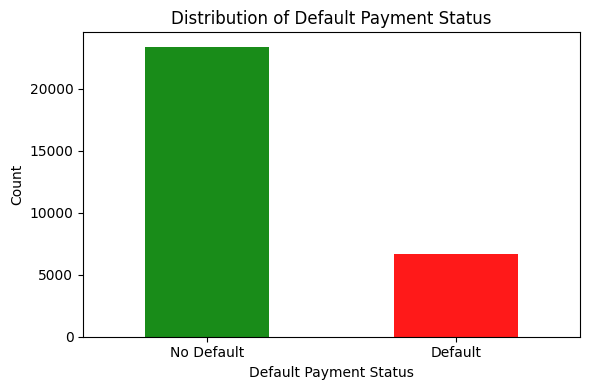

In [23]:
plt.figure(figsize=(6, 4))
target_counts.plot(kind='bar', color=['green', 'red'], alpha=0.9)
plt.title('Distribution of Default Payment Status')
plt.xlabel('Default Payment Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Interpretations:
1. An imbalance in the dataset where the majority of credit card clients do not default on their payments
2. No Default (class 0, green bar) represents approximately 77.9% of the cases
3. Default (class 1, red bar) represents approximately 22.1% of the cases
4. This imbalanced distribution suggests that special consideration may be needed when building predictive models to avoid bias towards the majority class

#### Exploring the Numerical Variables

In [24]:
print("\nCredit Limit Summary Statistics:")
print("--------------------------------")
stats = df['LIMIT_BAL'].describe()
formatted_stats = {stat: f"{value:,.0f}" for stat, value in stats.items()}
for stat, value in formatted_stats.items():
    print(f"{stat.capitalize()}: {value}")


Credit Limit Summary Statistics:
--------------------------------
Count: 30,000
Mean: 167,484
Std: 129,748
Min: 10,000
25%: 50,000
50%: 140,000
75%: 240,000
Max: 1,000,000


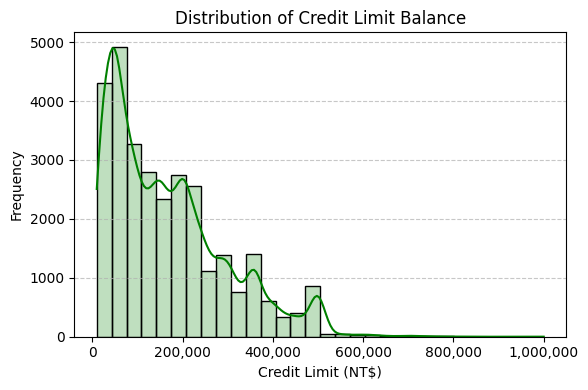

In [25]:
# LIMIT_BAL Distribution
# sns.kdeplot(df['LIMIT_BAL'], color='red', linewidth=2)
plt.figure(figsize=(6, 4))
sns.histplot(df['LIMIT_BAL'], kde=True, color='green', bins=30, alpha=0.25)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=0)
plt.title('Distribution of Credit Limit Balance')
plt.xlabel('Credit Limit (NT$)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Analysis of Distribution - Credit Limit Balance (LIMIT_BAL)
1. Shows a right-skewed (positively skewed) distribution
2. Most credit limits are concentrated between NTD 10,000 and NTD 500,000
3. Median credit limit is NTD 140,000
4. Has a long right tail indicating some customers with very high credit limits
5. Not normally distributed

In [26]:
print("\nAge Summary Statistics:")
print("----------------------")
stats = df['AGE'].describe()
formatted_stats = {stat: f"{value:,.0f}" for stat, value in stats.items()}  # Format the statistics for better readability
for stat, value in formatted_stats.items():
    print(f"{stat.capitalize()}: {value}")


Age Summary Statistics:
----------------------
Count: 30,000
Mean: 35
Std: 9
Min: 21
25%: 28
50%: 34
75%: 41
Max: 79


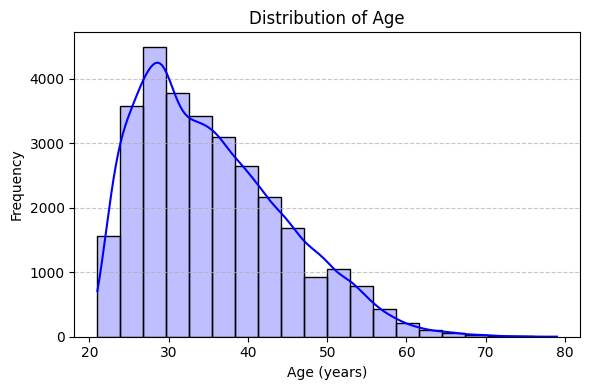

In [27]:
# AGE Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['AGE'], kde=True, color='blue', bins=20, alpha=0.25)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))  # Formatting x-axis labels for clarity
plt.xticks(rotation=0)
plt.title('Distribution of Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Slightly reduced alpha for subtler grid lines
plt.tight_layout()
plt.show()

<b>Analysis of Distribution - Age</b>
1. Shows a slightly right-skewed distribution
2. Most customers are between 25 and 45 years old
3. Median age is 34 years
4. The distribution is more symmetric than the credit limit distribution
5. Closer to normal distribution but not perfectly normal

---

### Feature Engineering

In [28]:
# Engineering feature - Average Bill Amount
df['AVG_BILL_AMT'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)

In [29]:
# Descriptive statistics for Average Bill Amount
df['AVG_BILL_AMT'].describe()

count     30000.000000
mean      44976.945200
std       63260.721860
min      -56043.166667
25%        4781.333333
50%       21051.833333
75%       57104.416667
max      877313.833333
Name: AVG_BILL_AMT, dtype: float64

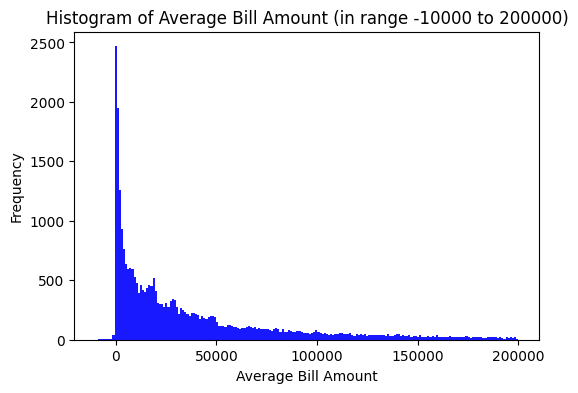

In [30]:
# Histogram of Average Bill Amount
plt.figure(figsize=(6, 4))
plt.hist(df['AVG_BILL_AMT'], bins=200, color='blue', alpha=0.9, range=[-10000, 200000])
plt.title('Histogram of Average Bill Amount (in range -10000 to 200000)')
plt.xlabel('Average Bill Amount')
plt.ylabel('Frequency')
plt.show()

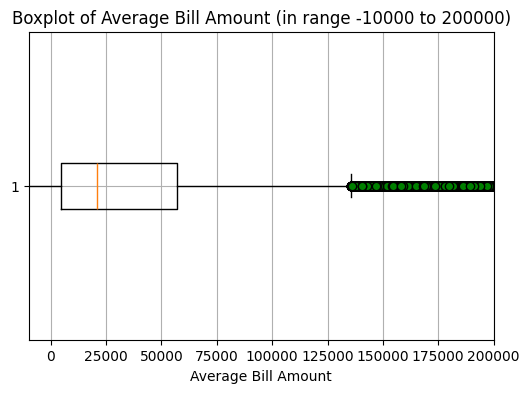

In [31]:
# Boxplot of Average Bill Amount
plt.figure(figsize=(6, 4))
plt.boxplot(df['AVG_BILL_AMT'], vert=False, flierprops=dict(markerfacecolor='g', marker='o'))
plt.title('Boxplot of Average Bill Amount (in range -10000 to 200000)')
plt.xlabel('Average Bill Amount')
plt.xlim(-10000, 200000)
plt.grid(True)
plt.show()

In [32]:
# Engineering feature - Average Payment Amount
df['AVG_PAY_AMT'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)

In [33]:
# Descriptive statistics for Average Payment Amount
df['AVG_PAY_AMT'].describe()

count     30000.000000
mean       5275.232094
std       10137.946323
min           0.000000
25%        1113.291667
50%        2397.166667
75%        5583.916667
max      627344.333333
Name: AVG_PAY_AMT, dtype: float64

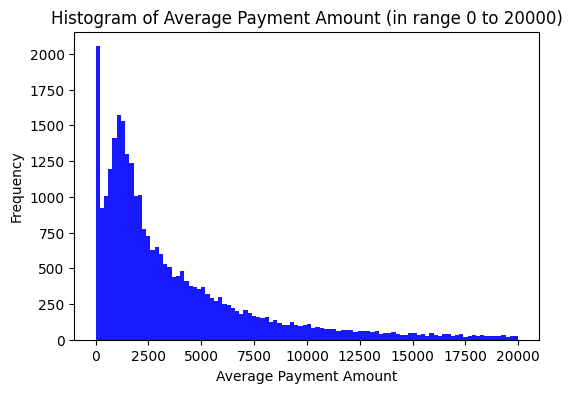

In [34]:
# Histogram of Average Payment Amount
plt.figure(figsize=(6, 4))
plt.hist(df['AVG_PAY_AMT'], bins=100, color='blue', alpha=0.9, range=[0, 20000])
plt.title('Histogram of Average Payment Amount (in range 0 to 20000)')
plt.xlabel('Average Payment Amount')
plt.ylabel('Frequency')
plt.show()

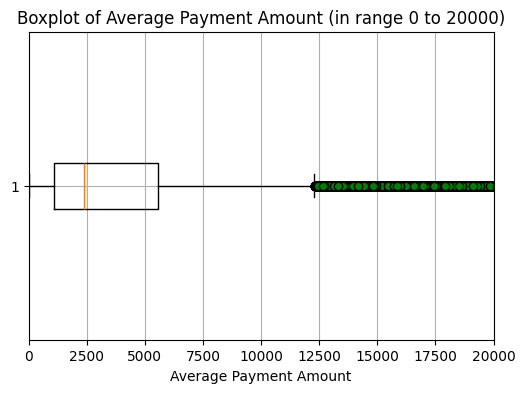

In [35]:
# Boxplot of Average Payment Amount
plt.figure(figsize=(6, 4))
plt.boxplot(df['AVG_PAY_AMT'], vert=False, flierprops=dict(markerfacecolor='g', marker='o'), whis=1.5)
plt.title('Boxplot of Average Payment Amount (in range 0 to 20000)')
plt.xlabel('Average Payment Amount')
plt.xlim(0, 20000)
plt.grid(True)
plt.show()

In [36]:
# Engineering feature - Overall Credit Utilization Ratio
df['OVERALL_UTIL_RATIO'] = df['AVG_BILL_AMT'] / df['LIMIT_BAL']

In [37]:
# Descriptive statistics for Overall Credit Utilization
df['OVERALL_UTIL_RATIO'].describe()

count    30000.000000
mean         0.373048
std          0.351890
min         -0.232590
25%          0.029997
50%          0.284834
75%          0.687929
max          5.364308
Name: OVERALL_UTIL_RATIO, dtype: float64

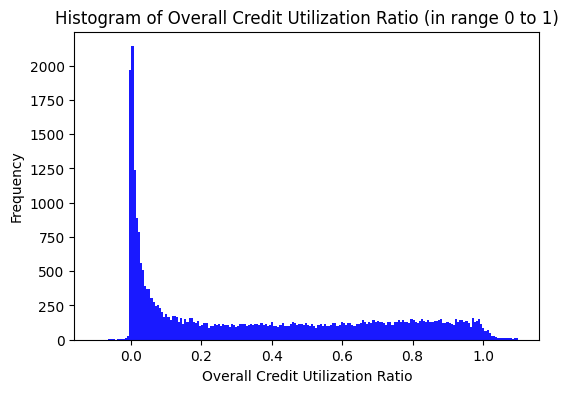

In [38]:
# Histogram of Overall Credit Utilization Ratio
plt.figure(figsize=(6, 4))
plt.hist(df['OVERALL_UTIL_RATIO'], bins=200, color='blue', alpha=0.9, range=[-0.1, 1.1])
plt.title('Histogram of Overall Credit Utilization Ratio (in range 0 to 1)')
plt.xlabel('Overall Credit Utilization Ratio')
plt.ylabel('Frequency')
plt.show()

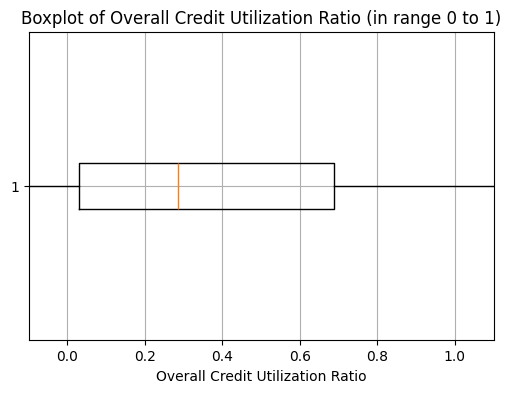

In [39]:
# Boxplot of Overall Credit Utilization Ratio
plt.figure(figsize=(6, 4))
plt.boxplot(df['OVERALL_UTIL_RATIO'], vert=False, flierprops=dict(markerfacecolor='g', marker='o'))
plt.title('Boxplot of Overall Credit Utilization Ratio (in range 0 to 1)')
plt.xlabel('Overall Credit Utilization Ratio')
plt.xlim(-0.1, 1.1)
plt.grid(True)
plt.show()

<b>"Debt Growth/Reduction Over Time"</b>. captures the change in a customer's debt level from the beginning to the end of the observed period. Essentially, it measures whether the customer's financial liability on their credit card has increased, decreased, or remained stable over the span of six months. This can be calculated as the difference between the final month's bill amount and the first month's bill amount, divided by the credit limit:

<b>Debt Growth = (BILL_AMT6 − BILL_AMT1) / (LIMIT_BAL)</b>

This feature serves as a direct indicator of a customer's financial discipline. An increasing trend might suggest that the customer is becoming more leveraged, potentially facing difficulties in managing their finances, which might lead to a higher risk of default. Conversely, a decreasing trend could indicate good financial health and management, suggesting a lower risk of default.

In [40]:
# Engineering feature - Debt Growth/Reduction Over Time
df['DEBT_GROWTH'] = (df['BILL_AMT6'] - df['BILL_AMT1']) / df['LIMIT_BAL']

In [41]:
# Descriptive statistics for Debt Growth/Reduction Over Time
df['DEBT_GROWTH'].describe()

count    30000.000000
mean        -0.105187
std          0.301370
min         -5.309500
25%         -0.181202
50%         -0.006860
75%          0.029097
max          1.827300
Name: DEBT_GROWTH, dtype: float64

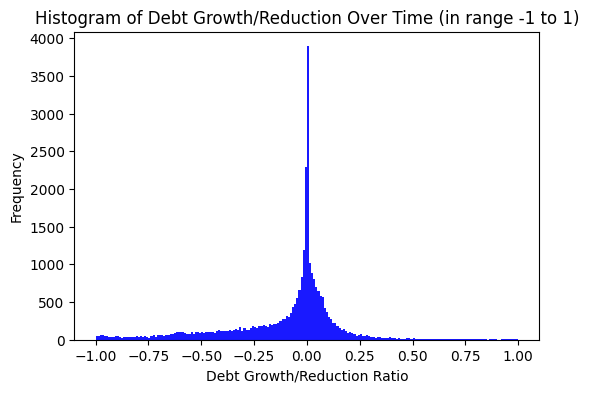

In [42]:
# Histogram of Debt Growth/Reduction Over Time
plt.figure(figsize=(6, 4))
plt.hist(df['DEBT_GROWTH'], bins=200, color='blue', alpha=0.9, range=[-1, 1])
plt.title('Histogram of Debt Growth/Reduction Over Time (in range -1 to 1)')
plt.xlabel('Debt Growth/Reduction Ratio')
plt.ylabel('Frequency')
plt.show()

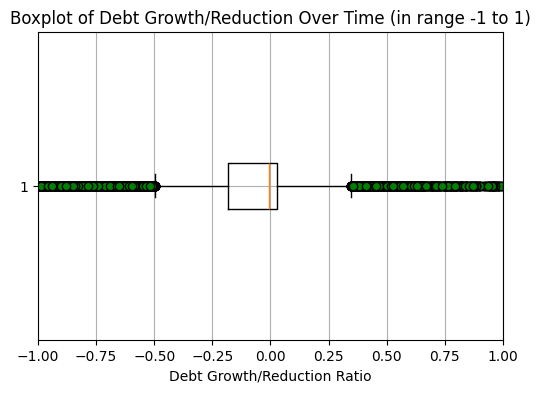

In [43]:
# Boxplot of Debt Growth/Reduction Over Time
plt.figure(figsize=(6, 4))
plt.boxplot(df['DEBT_GROWTH'], vert=False, flierprops=dict(markerfacecolor='g', marker='o'))
plt.title('Boxplot of Debt Growth/Reduction Over Time (in range -1 to 1)')
plt.xlabel('Debt Growth/Reduction Ratio')
plt.xlim(-1, 1)
plt.grid(True)
plt.show()

<b>"Interaction between 'SEX' and 'MARRIAGE'"</b> can provide insights into how different demographic combinations affect credit behavior and risk. For example, married individuals might have different financial responsibilities and behaviors than single individuals, and these responsibilities can further vary by gender.

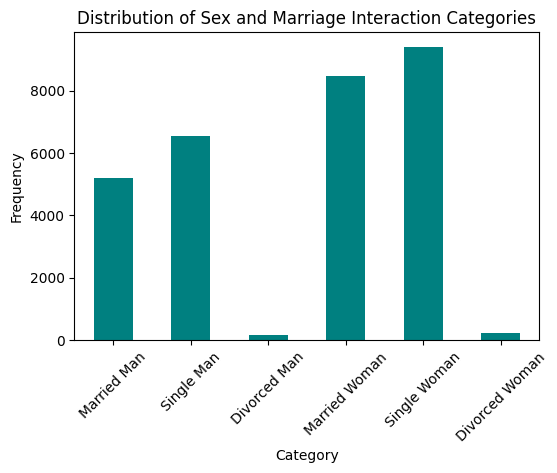

In [44]:
df['SEX_MARRIAGE_INTERACTION'] = 0
# Assign codes based on SEX and MARRIAGE combinations
df.loc[(df['SEX'] == 1) & (df['MARRIAGE'] == 1), 'SEX_MARRIAGE_INTERACTION'] = 1  # Married man
df.loc[(df['SEX'] == 1) & (df['MARRIAGE'] == 2), 'SEX_MARRIAGE_INTERACTION'] = 2  # Single man
df.loc[(df['SEX'] == 1) & (df['MARRIAGE'] == 3), 'SEX_MARRIAGE_INTERACTION'] = 3  # Divorced man
df.loc[(df['SEX'] == 2) & (df['MARRIAGE'] == 1), 'SEX_MARRIAGE_INTERACTION'] = 4  # Married woman
df.loc[(df['SEX'] == 2) & (df['MARRIAGE'] == 2), 'SEX_MARRIAGE_INTERACTION'] = 5  # Single woman
df.loc[(df['SEX'] == 2) & (df['MARRIAGE'] == 3), 'SEX_MARRIAGE_INTERACTION'] = 6  # Divorced woman

# Plotting the distribution of sex_marriage_interaction categories
sex_marriage_interaction_counts = df['SEX_MARRIAGE_INTERACTION'].value_counts().sort_index()
plt.figure(figsize=(6, 4))
sex_marriage_interaction_counts.plot(kind='bar', color='teal')
plt.title('Distribution of Sex and Marriage Interaction Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(ticks=range(6), labels=['Married Man', 'Single Man', 'Divorced Man', 'Married Woman', 'Single Woman', 'Divorced Woman'], rotation=45)
plt.show()

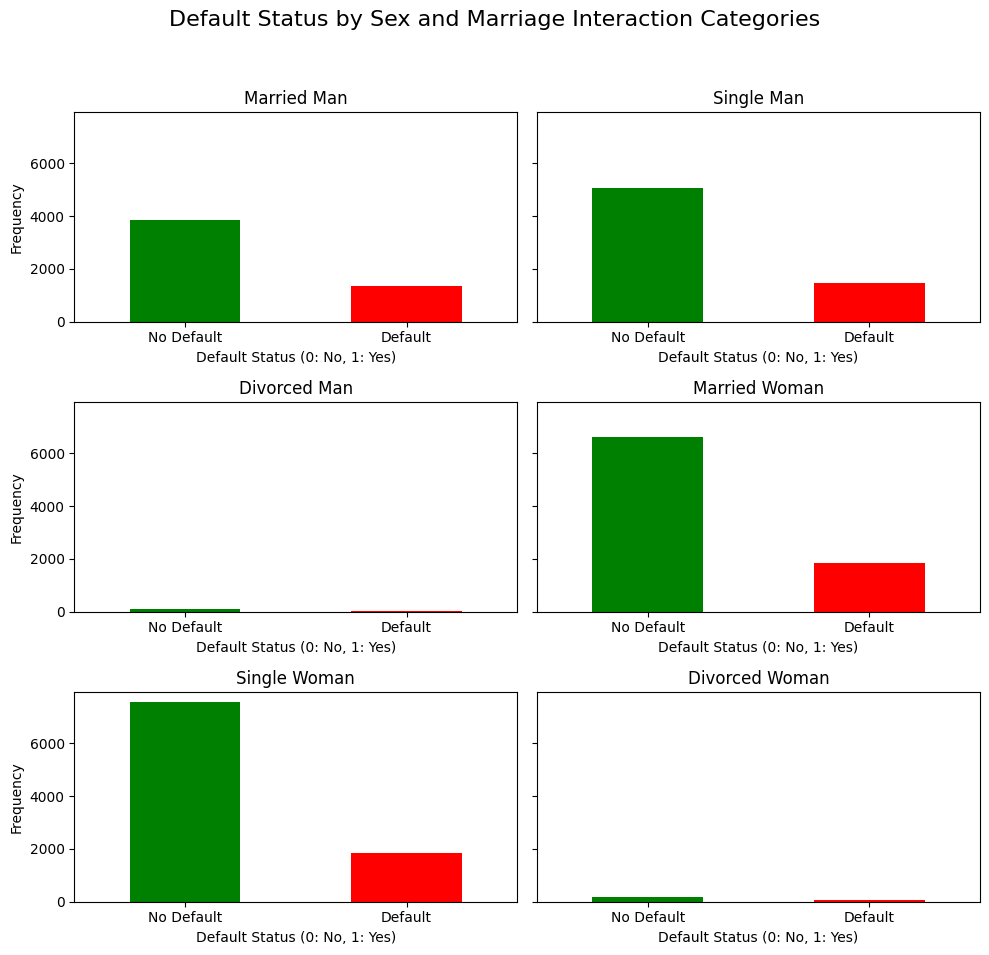

In [45]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), sharey=True)
fig.suptitle('Default Status by Sex and Marriage Interaction Categories', fontsize=16)

labels = ['Married Man', 'Single Man', 'Divorced Man', 'Married Woman', 'Single Woman', 'Divorced Woman']

for i, label in enumerate(labels, start=1):
    # Filter the dataframe for the specific category and count the default status
    category_data = df[df['SEX_MARRIAGE_INTERACTION'] == i]['default'].value_counts().sort_index()
    
    ax = axes[(i-1) // 2, (i-1) % 2]
    category_data.plot(kind='bar', ax=ax, color=['green', 'red'])
    ax.set_title(label)
    ax.set_xlabel('Default Status (0: No, 1: Yes)')
    ax.set_ylabel('Frequency')
    ax.set_xticklabels(['No Default', 'Default'], rotation=0)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [46]:
summary = df.groupby('SEX_MARRIAGE_INTERACTION')['default'].value_counts().unstack(fill_value=0)
summary.columns = ['No Default', 'Default']
summary['Total'] = summary.sum(axis=1)

category_labels = {
    1: 'Married Man',
    2: 'Single Man',
    3: 'Divorced Man',
    4: 'Married Woman',
    5: 'Single Woman',
    6: 'Divorced Woman'
}
summary.rename(index=category_labels, inplace=True)
summary

,No Default,Default,Total
SEX_MARRIAGE_INTERACTION,,,
Married Man,3844,1346,5190
Single Man,5068,1485,6553
Divorced Man,103,42,145
Married Woman,6609,1860,8469
Single Woman,7555,1856,9411
Divorced Woman,185,47,232


---

### Predictions and Model Training

#### Defining features and target variable

In [47]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default',
       'AVG_BILL_AMT', 'AVG_PAY_AMT', 'OVERALL_UTIL_RATIO', 'DEBT_GROWTH',
       'SEX_MARRIAGE_INTERACTION'],
      dtype='object')

In [48]:
excluded_columns = ['default']
features = df.columns.difference(excluded_columns).tolist()

In [49]:
# Creating the feature and target DataFrames
X = df[features].copy()
y = df['default'].copy()

print(X.columns)

Index(['AGE', 'AVG_BILL_AMT', 'AVG_PAY_AMT', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'DEBT_GROWTH',
       'EDUCATION', 'LIMIT_BAL', 'MARRIAGE', 'OVERALL_UTIL_RATIO', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX',
       'SEX_MARRIAGE_INTERACTION'],
      dtype='object')


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [51]:
scaler = StandardScaler()
standarized_X = scaler.fit_transform(X)
standardized_X_train = scaler.fit_transform(X_train)
standardized_X_test = scaler.transform(X_test)

#### Model Implementation - Logistic regression

In [52]:
logistic_model = LogisticRegression(random_state=42)

##### Logistic Regression - All features (without standarization)

In [53]:
logistic_model.fit(X_train, y_train)

C:\Users\Shreyder\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [54]:
# Predictions
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

In [55]:
# Evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_roc_auc = roc_auc_score(y_train, y_train_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

print(f"\nTraining ROC-AUC: {train_roc_auc:.4f}")
print(f"Testing ROC-AUC: {test_roc_auc:.4f}")

print("\nClassification Report:")
print(class_report)

Training Accuracy: 0.7788
Testing Accuracy: 0.7788

Training ROC-AUC: 0.5000
Testing ROC-AUC: 0.5000

Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4673
           1       0.00      0.00      0.00      1327

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000



C:\Users\Shreyder\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shreyder\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shreyder\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

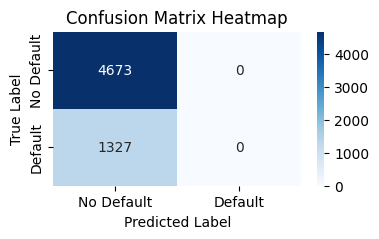

In [56]:
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

---

##### Logistic Regression - All features (with standarization)

In [57]:
logistic_model.fit(standardized_X_train, y_train)

LogisticRegression(random_state=42)

In [58]:
# Predictions
y_train_pred = logistic_model.predict(standardized_X_train)
y_test_pred = logistic_model.predict(standardized_X_test)

In [59]:
# Evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_roc_auc = roc_auc_score(y_train, y_train_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Training Accuracy (Standardized Features): {train_accuracy:.4f}")
print(f"Testing Accuracy (Standardized Features): {test_accuracy:.4f}")

print(f"\nTraining ROC-AUC: {train_roc_auc:.4f}")
print(f"Testing ROC-AUC: {test_roc_auc:.4f}")

print("\nClassification Report (Standardized Features):")
print(class_report)

Training Accuracy (Standardized Features): 0.8106
Testing Accuracy (Standardized Features): 0.8092

Training ROC-AUC: 0.6092
Testing ROC-AUC: 0.6055

Classification Report (Standardized Features):
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.70      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.76      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000



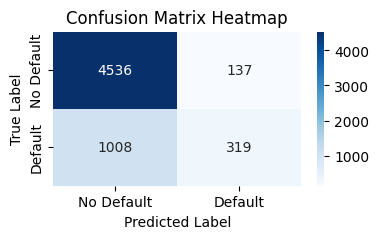

In [60]:
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

---

##### Logistic Regression - Intuition Features

In [61]:
# Suggested features
intuition_features = ['AGE', 'AVG_PAY_AMT', 'DEBT_GROWTH', 'LIMIT_BAL', 'MARRIAGE', 'OVERALL_UTIL_RATIO', 'SEX_MARRIAGE_INTERACTION']

features_1 = ['AGE', 'AVG_PAY_AMT', 'DEBT_GROWTH', 'LIMIT_BAL', 'MARRIAGE', 'OVERALL_UTIL_RATIO']
features_2 = ['SEX_MARRIAGE_INTERACTION']

# Standardize only features_1
intuition_X_train_features_1 = scaler.fit_transform(X_train[features_1])
intuition_X_test_features_1 = scaler.transform(X_test[features_1])

# Combine features
X_train_intuition = np.hstack((intuition_X_train_features_1, X_train[features_2]))
X_test_intuition = np.hstack((intuition_X_test_features_1, X_test[features_2]))

In [62]:
logistic_model.fit(X_train_intuition, y_train)

LogisticRegression(random_state=42)

In [63]:
# Predictions
y_train_pred = logistic_model.predict(X_train_intuition)
y_test_pred = logistic_model.predict(X_test_intuition)

In [64]:
# Evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_roc_auc = roc_auc_score(y_train, y_train_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Print metrics with descriptive messages
print(f"Training Accuracy (Suggested Features): {train_accuracy:.4f}")
print(f"Testing Accuracy (Suggested Features): {test_accuracy:.4f}")

print(f"\nTraining ROC-AUC: {train_roc_auc:.4f}")
print(f"Testing ROC-AUC: {test_roc_auc:.4f}")

print("\nClassification Report (Suggested Features):")
print(class_report)

Training Accuracy (Suggested Features): 0.7782
Testing Accuracy (Suggested Features): 0.7787

Training ROC-AUC: 0.5003
Testing ROC-AUC: 0.5010

Classification Report (Suggested Features):
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4673
           1       0.44      0.00      0.01      1327

    accuracy                           0.78      6000
   macro avg       0.61      0.50      0.44      6000
weighted avg       0.71      0.78      0.68      6000



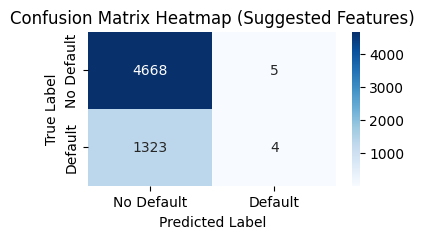

In [65]:
# Confusion matrix heatmap visualization
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix Heatmap (Suggested Features)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

---

##### Logistic Regression - Features suggested by RFE

Recursive Feature Elimination (RFE) is a systematic feature selection algorithm that iteratively identifies and retains the most significant features while eliminating the least important ones based on importance scores or coefficients. The process begins by training a model on the complete feature set, computing importance scores for each predictor, and then recursively removes the weakest features until reaching a specified number of optimal features.

In [66]:
# Define number of features to select
num_of_features = 5

In [67]:
# Create and fit the RFE model
rfe = RFE(logistic_model, n_features_to_select=num_of_features)
fitted_selector = rfe.fit(standardized_X_train, y_train)

In [68]:
# Print feature ranking and model score
print("Feature Ranking (lower is better):", fitted_selector.ranking_)

# Score the model using training and test data
train_score = fitted_selector.score(standardized_X_train, y_train)
test_score = fitted_selector.score(standardized_X_test, y_test)
print(f"Model Score - Training: {train_score:.4f}, Testing: {test_score:.4f}")

Feature Ranking (lower is better): [ 5 21  1  8  9  7 12 17  6  2 10  1 15 13  1  4  1 14 23 20  1  3 24 22
 18 19 16 11]
Model Score - Training: 0.8124, Testing: 0.8108


In [69]:
selected_features = X_train.columns[rfe.support_]
print("\nSelected features:", list(selected_features))


Selected features: ['AVG_PAY_AMT', 'LIMIT_BAL', 'PAY_1', 'PAY_3', 'PAY_AMT1']


In [70]:
selected_features = ['AVG_PAY_AMT', 'LIMIT_BAL', 'PAY_1', 'PAY_3', 'PAY_AMT1']
selected_feature_indices = [X_train.columns.get_loc(feature) for feature in selected_features]

standardized_X_train_selected = standardized_X_train[:, selected_feature_indices]
standardized_X_test_selected = standardized_X_test[:, selected_feature_indices]

In [71]:
logistic_model.fit(standardized_X_train_selected, y_train)

LogisticRegression(random_state=42)

In [72]:
# Predictions
y_train_pred = logistic_model.predict(standardized_X_train_selected)
y_test_pred = logistic_model.predict(standardized_X_test_selected)

In [73]:
# Evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_roc_auc = roc_auc_score(y_train, y_train_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Print metrics with descriptive messages
print(f"Training Accuracy (Selected Features): {train_accuracy:.4f}")
print(f"Testing Accuracy (Selected Features): {test_accuracy:.4f}")

print(f"\nTraining ROC-AUC: {train_roc_auc:.4f}")
print(f"Testing ROC-AUC: {test_roc_auc:.4f}")

print("\nClassification Report (Selected Features):")
print(class_report)

Training Accuracy (Selected Features): 0.8124
Testing Accuracy (Selected Features): 0.8108

Training ROC-AUC: 0.6093
Testing ROC-AUC: 0.6093

Classification Report (Selected Features):
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.71      0.25      0.37      1327

    accuracy                           0.81      6000
   macro avg       0.76      0.61      0.63      6000
weighted avg       0.79      0.81      0.77      6000



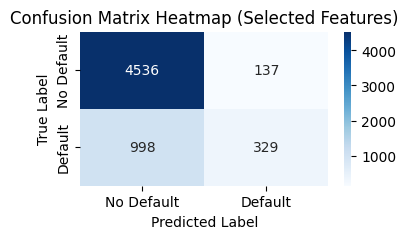

In [74]:
# Confusion matrix heatmap visualization
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix Heatmap (Selected Features)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

---

#### Model Implementation - Decision Tree

In [75]:
decision_tree_model = DecisionTreeClassifier(random_state=42)

##### Decision Tree - All features (without standardization)

In [76]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [77]:
# Predictions
y_train_pred = decision_tree_model.predict(X_train)
y_test_pred = decision_tree_model.predict(X_test)

In [78]:
# Evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_roc_auc = roc_auc_score(y_train, y_train_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Print metrics with descriptive messages
print(f"Training Accuracy (Decision Tree - Original Data): {train_accuracy:.4f}")
print(f"Testing Accuracy (Decision Tree - Original Data): {test_accuracy:.4f}")

print(f"\nTraining ROC-AUC: {train_roc_auc:.4f}")
print(f"Testing ROC-AUC: {test_roc_auc:.4f}")

print("\nClassification Report (Decision Tree - Original Data):")
print(class_report)

Training Accuracy (Decision Tree - Original Data): 0.9995
Testing Accuracy (Decision Tree - Original Data): 0.7272

Training ROC-AUC: 0.9988
Testing ROC-AUC: 0.6141

Classification Report (Decision Tree - Original Data):
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4673
           1       0.39      0.41      0.40      1327

    accuracy                           0.73      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.73      0.73      6000



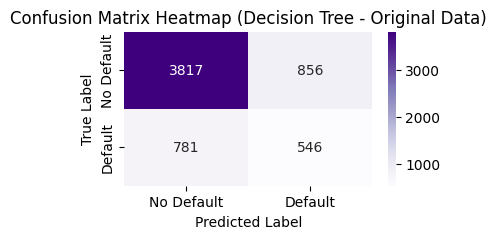

In [79]:
# Confusion matrix heatmap visualization
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix Heatmap (Decision Tree - Original Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Feature Importance (Top 10):
               Feature  Importance
14               PAY_1    0.159313
0                  AGE    0.068532
9          DEBT_GROWTH    0.062264
13  OVERALL_UTIL_RATIO    0.059984
2          AVG_PAY_AMT    0.057640
11           LIMIT_BAL    0.040747
20            PAY_AMT1    0.040219
25            PAY_AMT6    0.039183
15               PAY_2    0.036489
23            PAY_AMT4    0.036145


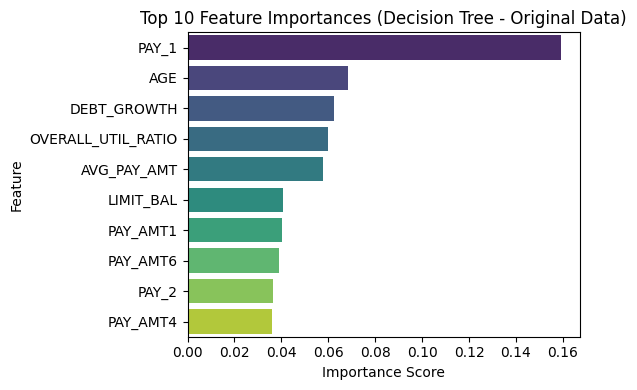

In [80]:
# Feature Importance
importances = decision_tree_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the top features
print("Feature Importance (Top 10):")
print(feature_importance_df.head(10))

# Plot the feature importance
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_importance_df.head(10), palette='viridis', legend=False)
plt.title('Top 10 Feature Importances (Decision Tree - Original Data)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

##### Decision Tree - All features (with standardization)

In [81]:
decision_tree_model.fit(standardized_X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [82]:
# Predictions
y_train_pred = decision_tree_model.predict(standardized_X_train)
y_test_pred = decision_tree_model.predict(standardized_X_test)

In [83]:
# Evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_roc_auc = roc_auc_score(y_train, y_train_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Print metrics with descriptive messages
print(f"Training Accuracy (Decision Tree - Standardized Data): {train_accuracy:.4f}")
print(f"Testing Accuracy (Decision Tree - Standardized Data): {test_accuracy:.4f}")

print(f"\nTraining ROC-AUC: {train_roc_auc:.4f}")
print(f"Testing ROC-AUC: {test_roc_auc:.4f}")

print("\nClassification Report (Decision Tree - Standardized Data):")
print(class_report)

Training Accuracy (Decision Tree - Standardized Data): 0.9995
Testing Accuracy (Decision Tree - Standardized Data): 0.7278

Training ROC-AUC: 0.9988
Testing ROC-AUC: 0.6148

Classification Report (Decision Tree - Standardized Data):
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4673
           1       0.39      0.41      0.40      1327

    accuracy                           0.73      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.73      0.73      6000



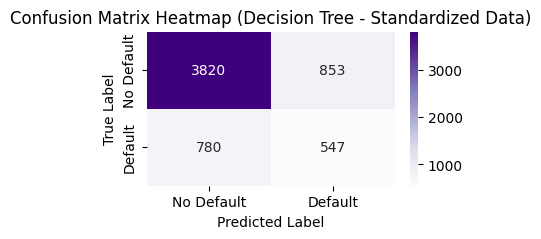

In [84]:
# Confusion matrix heatmap visualization
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix Heatmap (Decision Tree - Standardized Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Feature Importance (Top 10):
               Feature  Importance
14               PAY_1    0.159313
0                  AGE    0.068532
9          DEBT_GROWTH    0.062264
13  OVERALL_UTIL_RATIO    0.059984
2          AVG_PAY_AMT    0.057640
11           LIMIT_BAL    0.040747
20            PAY_AMT1    0.040219
25            PAY_AMT6    0.039183
15               PAY_2    0.036489
23            PAY_AMT4    0.036145


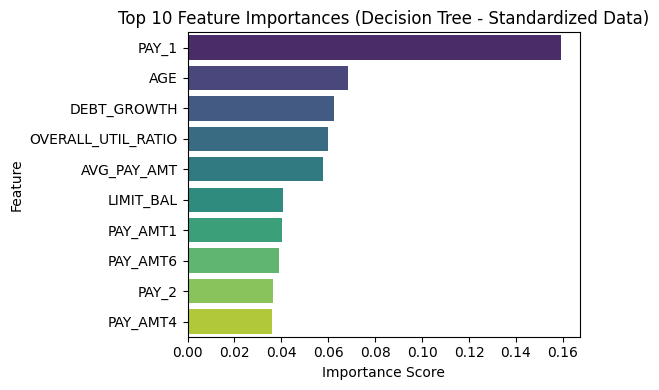

In [85]:
# Feature Importance
importances = decision_tree_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the top features
print("Feature Importance (Top 10):")
print(feature_importance_df.head(10))

# Plot the feature importance
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_importance_df.head(10), palette='viridis', legend=False)
plt.title('Top 10 Feature Importances (Decision Tree - Standardized Data)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

---

Observations and Learnings: 
- Decision Tree models tend to overfit when no hyperparameters are tuned, especially if the <i>max_depth</i> is not constrained, which is True in the above two cases. This allows the tree to grow excessively deep, memorizing the training data, resulting in nearly perfect training accuracy. However, it performs poorly on unseen data (test set), as reflected by the lower testing accuracy (<75%) 
- Decision Trees are not sensitive to feature scaling. They split the data based on feature thresholds, which are unaffected by the magnitude or distribution of feature values. Thus, standardization is unnecessary for Decision Trees.

##### Decision Tree - Hyperparameter Tuning - Accuracy as the scoring metric

In [86]:
param_grid = {'max_depth': np.arange(4, 12),
             'criterion' : ['gini','entropy'],
             'min_samples_leaf': [1, 2, 5, 10],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [87]:
grid_search.fit(X_train, y_train)

best_decision_tree_model = grid_search.best_estimator_
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")
print("Best Hyperparameters:", grid_search.best_params_)

Best Cross-Validation Score: 0.8211
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': np.int64(5), 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [88]:
# Predictions using the best model
y_train_pred = best_decision_tree_model.predict(X_train)
y_test_pred = best_decision_tree_model.predict(X_test)

In [89]:
# Evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_roc_auc = roc_auc_score(y_train, y_train_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Print metrics with descriptive messages
print(f"Training Accuracy (Decision Tree with Hyperparameter Tuning): {train_accuracy:.4f}")
print(f"Testing Accuracy (Decision Tree with Hyperparameter Tuning): {test_accuracy:.4f}")

print(f"\nTraining ROC-AUC: {train_roc_auc:.4f}")
print(f"Testing ROC-AUC: {test_roc_auc:.4f}")

print("\nClassification Report (Decision Tree with Hyperparameter Tuning):")
print(class_report)

Training Accuracy (Decision Tree with Hyperparameter Tuning): 0.8232
Testing Accuracy (Decision Tree with Hyperparameter Tuning): 0.8187

Training ROC-AUC: 0.6633
Testing ROC-AUC: 0.6572

Classification Report (Decision Tree with Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.37      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



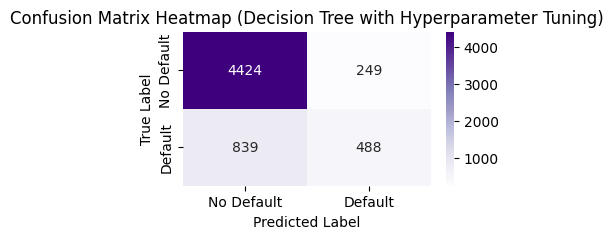

In [90]:
# Confusion matrix heatmap visualization
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix Heatmap (Decision Tree with Hyperparameter Tuning)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Feature Importance (Top 10):
               Feature  Importance
14               PAY_1    0.636570
15               PAY_2    0.156630
2          AVG_PAY_AMT    0.082682
9          DEBT_GROWTH    0.032046
16               PAY_3    0.024191
13  OVERALL_UTIL_RATIO    0.021121
3            BILL_AMT1    0.010452
18               PAY_5    0.008746
11           LIMIT_BAL    0.006763
17               PAY_4    0.006737


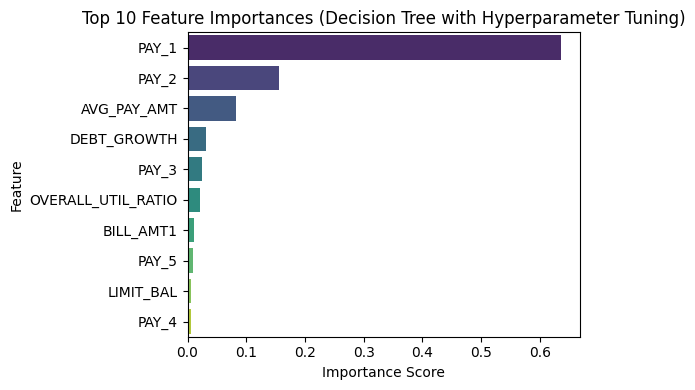

In [91]:
# Feature Importance
importances = best_decision_tree_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the top features
print("Feature Importance (Top 10):")
print(feature_importance_df.head(10))

# Plot the feature importance
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_importance_df.head(10), palette='viridis', legend=False)
plt.title('Top 10 Feature Importances (Decision Tree with Hyperparameter Tuning)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

##### Decision Tree - Hyperparameter Tuning - All 5 scoring metrics

In [92]:
# NOTE: This cell takes more than 10 minutes to run
param_grid = {'max_depth': np.arange(4, 12),
             'criterion' : ['gini','entropy'],
             'min_samples_leaf': [1, 2, 5, 10],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]
}

# Dictionary to store results for each metric
grid_search_results = {}

# Loop through the metrics and perform GridSearchCV for each
scoring_metrics = ['accuracy', 'f1', 'roc_auc', 'precision', 'recall']
for metric in scoring_metrics:
    grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, scoring=metric, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Store the best model and best parameters for each metric
    grid_search_results[metric] = {
        'best_model': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    }
    print(f"Best parameters for {metric}: {grid_search.best_params_}")
    print(f"Best {metric} score: {grid_search.best_score_:.4f}")

Best parameters for accuracy: {'criterion': 'entropy', 'max_depth': np.int64(5), 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best accuracy score: 0.8211
Best parameters for f1: {'criterion': 'gini', 'max_depth': np.int64(11), 'max_leaf_nodes': 100, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best f1 score: 0.4749
Best parameters for roc_auc: {'criterion': 'entropy', 'max_depth': np.int64(9), 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best roc_auc score: 0.7651
Best parameters for precision: {'criterion': 'entropy', 'max_depth': np.int64(6), 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best precision score: 0.7020
Best parameters for recall: {'criterion': 'gini', 'max_depth': np.int64(11), 'max_leaf_nodes': 100, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best recall score: 0.3792


In [93]:
# Select the best model based on a specified metric (choose from ['accuracy', 'f1', 'roc_auc', 'precision', 'recall'])
best_model = grid_search_results['f1']['best_model']

# Predictions using the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [94]:
# Evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_roc_auc = roc_auc_score(y_train, y_train_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Print metrics with descriptive messages
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

print(f"\nTraining ROC-AUC: {train_roc_auc:.4f}")
print(f"Testing ROC-AUC: {test_roc_auc:.4f}")

print("\nClassification Report (Decision Tree - Tuned on chosen metric above):")
print(class_report)

Training Accuracy: 0.8350
Testing Accuracy: 0.8113

Training ROC-AUC: 0.6839
Testing ROC-AUC: 0.6501

Classification Report (Decision Tree - Tuned on chosen metric above):
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



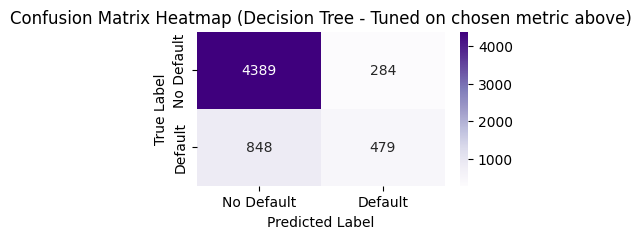

In [95]:
# Confusion matrix heatmap visualization
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix Heatmap (Decision Tree - Tuned on chosen metric above)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Feature Importance (Top 10):
               Feature  Importance
14               PAY_1    0.573874
15               PAY_2    0.115867
2          AVG_PAY_AMT    0.051243
9          DEBT_GROWTH    0.037304
17               PAY_4    0.025305
3            BILL_AMT1    0.024788
13  OVERALL_UTIL_RATIO    0.018976
11           LIMIT_BAL    0.018777
0                  AGE    0.014536
16               PAY_3    0.014018


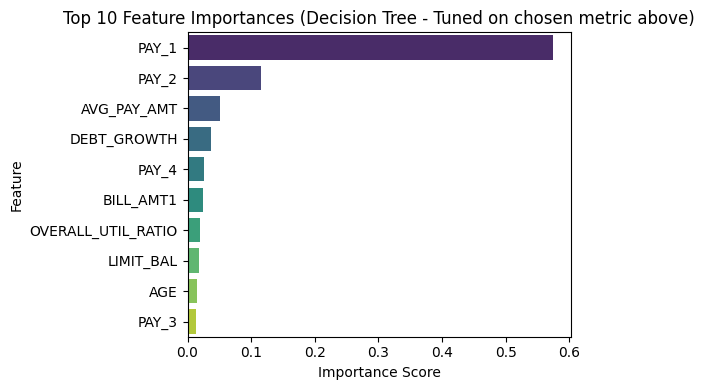

In [96]:
# Feature Importance
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the top features
print("Feature Importance (Top 10):")
print(feature_importance_df.head(10))

# Plot the feature importance
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_importance_df.head(10), palette='viridis', legend=False)
plt.title('Top 10 Feature Importances (Decision Tree - Tuned on chosen metric above)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

---

#### Model Implementation - Random forest

In [ ]:
# NOTE: This cell takes more than 5 hours to run when extensive hyperparameter tuning is done
param_grid = {
    # 'n_estimators': [50, 100, 150, 200, 250, 500],
    'n_estimators': [50, 100],  # Reduced range for faster execution
    # 'max_depth': [None, 2, 4, 8, 16, 32],
    'max_depth': [None, 4, 8],  # Reduced range for faster execution
    # 'min_samples_split': [2, 4, 8, 16],
    'min_samples_split': [2, 8],  # Redu  ced range for faster execution
    # 'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [1, 'sqrt', 'log2', None], 
    'bootstrap': [True, False],
    "criterion": ["gini", "entropy"]
}

# Dictionary to store results for each metric
grid_search_results = {}

# Loop through the metrics and perform GridSearchCV for each
scoring_metrics = ['accuracy', 'f1', 'roc_auc', 'precision', 'recall']
for metric in scoring_metrics:
    grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                               param_grid=param_grid, scoring=metric, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Store the best model and best parameters for each metric
    grid_search_results[metric] = {
        'best_model': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    }
    print(f"Best parameters for {metric}: {grid_search.best_params_}")
    print(f"Best {metric} score: {grid_search.best_score_:.4f}")

Best parameters for accuracy: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'min_samples_split': 8, 'n_estimators': 100}
Best accuracy score: 0.8225
Best parameters for f1: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 100}
Best f1 score: 0.4802
Best parameters for roc_auc: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}
Best roc_auc score: 0.7845
Best parameters for precision: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'max_features': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best precision score: 0.7808


In [ ]:
# Select the best model based on a specified metric (choose from ['accuracy', 'f1', 'roc_auc', 'precision', 'recall'])
best_model = grid_search_results['f1']['best_model']

# Predictions using the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [ ]:
# Evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_roc_auc = roc_auc_score(y_train, y_train_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Print metrics with descriptive messages
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

print(f"\nTraining ROC-AUC: {train_roc_auc:.4f}")
print(f"Testing ROC-AUC: {test_roc_auc:.4f}")

print("\nClassification Report (Random Forest - Tuned on chosen metric above):")
print(class_report)

In [ ]:
# Confusion matrix heatmap visualization
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix Heatmap (Random Forest - Tuned on chosen metric above)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Feature Importance
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the top features
print("Feature Importance (Top 10):")
print(feature_importance_df.head(10))

# Plot the feature importance
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_importance_df.head(10), palette='viridis', legend=False)
plt.title('Top 10 Feature Importances (Random Forest - Tuned on chosen metric above)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

---

### Interpretations and Conclusion

In [ ]:
df['default'].value_counts()

Dataset Characteristics:
- Highly imbalanced: 77.9% non-default vs 22.1% default cases
- Binary classification problem (default vs non-default)

<b>Choosing a scoring metric:</b> <br>

For this dataset, I suggest that F1-score would be the most appropriate metric for the following reasons in addition to the dataset characteristics highlighted above:
- F1-Score combines precision and recall into a single metric that balances both
- It is robust to class imbalance, unlike accuracy which can be misleading with skewed distributions
- F1-Score is particularly suitable when costs of false positives and false negatives are both important1

<b>Why Other Metrics Are Less Suitable:</b><br>
- Accuracy: Can be misleading for imbalanced datasets and can show artificially high values by simply predicting the majority class (no default)
- ROC-AUC: Can be appropriate as it is less sensitive to class imbalance but may give overly optimistic results for highly imbalanced datasets. It is Better suited for ranking predictions rather than classification decisions
- Precision or Recall (alone): Using either metric alone would give an incomplete picture as we need to find a balance between identifying true defaults (recall) and avoiding false alarms (precision)
- Thus, F1-score provides the best balance for this credit default prediction task where both identifying true defaults and minimizing false alarms are crucial for the financial institution.